In [2]:
import numpy as np

np.set_printoptions(threshold=10000, suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split

# Chargement des données
# Nous chargeons les données à partir d'un fichier CSV avec un séparateur de point-virgule.
# Ce fichier contient des informations sur le scoring de crédit avec une colonne "Status" qui est notre cible.
data = pd.read_csv("credit_scoring.csv", sep=";")

# Conversion en tableau numpy
# Nous convertissons les données en tableau numpy pour faciliter les manipulations avec les bibliothèques de Machine Learning.
data_np = data.values

# Séparation des caractéristiques (X) et de la cible (y)
# X contient toutes les colonnes sauf "Status", et y contient uniquement la colonne cible.
# Cela permet de séparer les données à prédire (caractéristiques) de ce que nous cherchons à prédire (statut du crédit).
X = data.drop(columns=["Status"]).values
y = data["Status"].values

# Analyse des données
# Nous calculons la taille totale de l'échantillon et analysons la distribution des classes cibles (positif et négatif).
# Cela nous aide à vérifier si les données sont équilibrées ou déséquilibrées.
sample_size = data.shape[0]
positive_count = np.sum(y == 1)  # Comptage des exemples positifs
negative_count = sample_size - positive_count  # Comptage des exemples négatifs
positive_pourcentage = (positive_count / sample_size) * 100
negative_pourcentage = (negative_count / sample_size) * 100

# Affichage des résultats de l'analyse
print("Taille de l'échantillon:", sample_size)
print("Pourcentage d'exemples positifs:", positive_pourcentage)
print("Pourcentage d'exemples négatifs:", negative_pourcentage)

# La taille totale de l'échantillon est de 4375 exemples.
# Le pourcentage de classes positives est de 72.2 %, et celui des classes négatives est de 27.8 %.
# Cela montre que nos données sont déséquilibrées en faveur des exemples positifs.

# Division des données en ensembles d'apprentissage et de test
# Nous divisons les données en deux ensembles : 50 % pour l'apprentissage et 50 % pour le test.
# Cela garantit que le modèle est évalué sur des données qui n'ont pas été utilisées pour son entraînement.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

# La division garantit que nous pouvons entraîner et tester nos modèles de manière équitable.
# Nous utilisons un 'random_state' fixe pour garantir que les résultats sont reproductibles.


Taille de l'échantillon: 4375
Pourcentage d'exemples positifs: 72.20571428571428
Pourcentage d'exemples négatifs: 27.794285714285717


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def compare_models(X_train, X_test, y_train, y_test):
    
    # Cette fonction compare les performances de trois modèles d'apprentissage supervisé
    # sur un ensemble de données : CART, kNN, et MLP.

    # Pour chaque modèle, elle :
    # - Entraîne le modèle sur les données d'apprentissage.
    # - Prédit les classes pour l'ensemble de test.
    # - Évalue les performances en utilisant des métriques : accuracy, precision, recall.
    # - Affiche la matrice de confusion et les résultats pour chaque modèle.

    # Dictionnaire contenant les modèles à comparer
    models = {
        "CART": DecisionTreeClassifier(random_state=1),  # Arbre de décision (CART)
        "kNN": KNeighborsClassifier(n_neighbors=5),      # k-Plus-Proches-Voisins (kNN)
        "MLP": MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1),  # Multi-Layer Perceptron (Réseau de neurones)
    }

    # Boucle pour entraîner et évaluer chaque modèle
    for name, model in models.items():
        # Entraînement du modèle sur les données d'apprentissage
        model.fit(X_train, y_train)

        # Prédiction sur l'ensemble de test
        y_pred = model.predict(X_test)

        # Calcul des métriques d'évaluation
        acc = accuracy_score(y_test, y_pred)  # Accuracy : proportion des prédictions correctes
        precision = precision_score(y_test, y_pred)  # Precision : pourcentage de prédictions positives correctes
        recall = recall_score(y_test, y_pred)  # Recall : capacité à identifier toutes les classes positives
        confusion = confusion_matrix(y_test, y_pred)  # Matrice de confusion

        # Affichage des résultats
        print(
            f"{name} - Accuracy: {acc:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}"
        )
        print(f"Confusion Matrix:\n{confusion}\n")

        # - La matrice de confusion permet d'identifier les faux positifs et faux négatifs.
        # - L'accuracy montre la performance globale, mais la precision et le recall donnent une vision plus fine
        #   des erreurs en fonction des classes.

# Exécution de la fonction pour comparer les modèles
compare_models(X_train, X_test, y_train, y_test)


# Résultats obtenus :
# 1. CART (Arbre de décision) :
#    - Accuracy : 73 %
#    - Precision : 82 %
#    - Recall : 80 %
#    - Analyse : Bon équilibre entre précision et rappel. Des faux positifs élevés (279) peuvent indiquer que le modèle
#                confond les classes positives et négatives.

# 2. kNN (k-Plus-Proches-Voisins) :
#    - Accuracy : 72 %
#    - Precision : 77 %
#    - Recall : 88 %
#    - Analyse : Très bon rappel, donc efficace pour identifier les classes positives. Cependant, un grand nombre de faux
#                positifs (415) réduit la précision.

# 3. MLP (Multi-layer Perceptron) :
#    - Accuracy : 58 %
#    - Precision : 82 %
#    - Recall : 54 %
#    - Analyse : Mauvais équilibre entre précision et rappel. Beaucoup de faux négatifs (734) indiquent que le modèle
#                a du mal à détecter les classes positives. Cela pourrait être amélioré en ajustant les hyperparamètres
#                ou en normalisant les données.


CART - Accuracy: 0.73, Precision: 0.82, Recall: 0.80
Confusion Matrix:
[[ 325  279]
 [ 318 1266]]

kNN - Accuracy: 0.72, Precision: 0.77, Recall: 0.88
Confusion Matrix:
[[ 189  415]
 [ 187 1397]]

MLP - Accuracy: 0.58, Precision: 0.82, Recall: 0.54
Confusion Matrix:
[[423 181]
 [734 850]]



'\nRésultats obtenus :\n1. CART (Arbre de décision) :\n   - Accuracy : 73 %\n   - Precision : 82 %\n   - Recall : 80 %\n   - Analyse : Bon équilibre entre précision et rappel. Des faux positifs élevés (279) peuvent indiquer que le modèle\n               confond les classes positives et négatives.\n\n2. kNN (k-Plus-Proches-Voisins) :\n   - Accuracy : 72 %\n   - Precision : 77 %\n   - Recall : 88 %\n   - Analyse : Très bon rappel, donc efficace pour identifier les classes positives. Cependant, un grand nombre de faux\n               positifs (415) réduit la précision.\n\n3. MLP (Multi-layer Perceptron) :\n   - Accuracy : 58 %\n   - Precision : 82 %\n   - Recall : 54 %\n   - Analyse : Mauvais équilibre entre précision et rappel. Beaucoup de faux négatifs (734) indiquent que le modèle\n               a du mal à détecter les classes positives. Cela pourrait être amélioré en ajustant les hyperparamètres\n               ou en normalisant les données.\n'

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
# Nous utilisons StandardScaler pour normaliser les données.
# Cela centre les données autour de 0 et réduit leur écart-type à 1, ce qui est essentiel pour les algorithmes sensibles à l'échelle des caractéristiques (comme kNN et MLP).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustement et transformation des données d'apprentissage
X_test_scaled = scaler.transform(X_test)  # Transformation des données de test en utilisant les paramètres appris sur X_train

# Comparaison des modèles avec les données normalisées
compare_models(X_train_scaled, X_test_scaled, y_train, y_test)

# Résultats obtenus après normalisation :

# 1. CART (Arbre de décision) :
#    - Accuracy : 73 %
#    - Precision : 82 %
#    - Recall : 80 %
#    - Confusion Matrix :
#        [[ 322  282]
#         [ 315 1269]]
#    - Analyse : Les résultats pour CART ne changent pas de manière significative après la normalisation.
#                Cela est attendu car les arbres de décision ne sont pas sensibles à l'échelle des données.

# 2. kNN (k-Plus-Proches-Voisins) :
#    - Accuracy : 75 %
#    - Precision : 81 %
#    - Recall : 86 %
#    - Confusion Matrix :
#        [[ 286  318]
#         [ 223 1361]]
#    - Analyse : La normalisation améliore sensiblement les performances de kNN.
#                La précision et le rappel augmentent, car les distances entre les points sont mieux calculées sur des données normalisées.

# 3. MLP (Multi-layer Perceptron) :
#    - Accuracy : 78 %
#    - Precision : 84 %
#    - Recall : 86 %
#    - Confusion Matrix :
#        [[ 342  262]
#         [ 227 1357]]
#    - Analyse : La normalisation a un impact important sur MLP.
#                Les performances (accuracy, precision, recall) augmentent nettement, montrant que le modèle converge mieux avec des données normalisées.

# Conclusions générales :
# - Les modèles sensibles à l'échelle des données, comme kNN et MLP, bénéficient fortement de la normalisation.
# - Pour CART, la normalisation n'est pas nécessaire car l'arbre de décision est basé sur des règles plutôt que sur des calculs basés sur des distances.


CART - Accuracy: 0.73, Precision: 0.82, Recall: 0.80
Confusion Matrix:
[[ 322  282]
 [ 315 1269]]

kNN - Accuracy: 0.75, Precision: 0.81, Recall: 0.86
Confusion Matrix:
[[ 286  318]
 [ 223 1361]]

MLP - Accuracy: 0.78, Precision: 0.84, Recall: 0.86
Confusion Matrix:
[[ 342  262]
 [ 227 1357]]



"\nRésultats obtenus après normalisation :\n\n1. CART (Arbre de décision) :\n   - Accuracy : 73 %\n   - Precision : 82 %\n   - Recall : 80 %\n   - Confusion Matrix :\n       [[ 322  282]\n        [ 315 1269]]\n   - Analyse : Les résultats pour CART ne changent pas de manière significative après la normalisation.\n               Cela est attendu car les arbres de décision ne sont pas sensibles à l'échelle des données.\n\n2. kNN (k-Plus-Proches-Voisins) :\n   - Accuracy : 75 %\n   - Precision : 81 %\n   - Recall : 86 %\n   - Confusion Matrix :\n       [[ 286  318]\n        [ 223 1361]]\n   - Analyse : La normalisation améliore sensiblement les performances de kNN.\n               La précision et le rappel augmentent, car les distances entre les points sont mieux calculées sur des données normalisées.\n\n3. MLP (Multi-layer Perceptron) :\n   - Accuracy : 78 %\n   - Precision : 84 %\n   - Recall : 86 %\n   - Confusion Matrix :\n       [[ 342  262]\n        [ 227 1357]]\n   - Analyse : La n

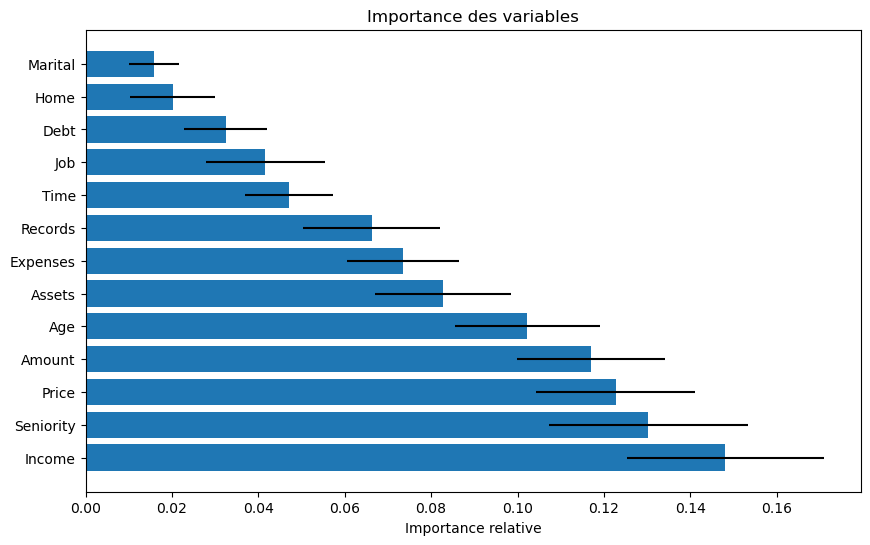

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Création et entraînement du modèle Random Forest
# RandomForestClassifier est utilisé pour déterminer l'importance relative de chaque variable.
# Nous utilisons 1000 arbres (n_estimators=1000) pour garantir une estimation robuste des importances.
clf = RandomForestClassifier(n_estimators=1000, random_state=1)
clf.fit(X_train_scaled, y_train)  # Entraînement du modèle sur les données normalisées

# Extraction des importances des variables
# feature_importances_ donne une mesure de l'importance de chaque variable dans les décisions de l'arbre.
# std représente l'écart type des importances calculées à partir de tous les arbres dans la forêt.
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Tri des variables par importance décroissante
# argsort retourne les indices des importances triées. Le slicing [::-1] inverse l'ordre pour un tri décroissant.
sorted_idx = np.argsort(importances)[::-1]

# Les noms des colonnes sans la cible "Status"
# Cela nous permet de faire correspondre les importances avec leurs variables respectives.
features = data.columns[:-1]

# Affichage des importances des variables
# Nous utilisons un graphique en barres horizontales pour visualiser les importances des variables.
plt.figure(figsize=(10, 6))
plt.barh(
    range(len(importances)),                  # Indices des variables
    importances[sorted_idx],                 # Importances triées
    xerr=std[sorted_idx],                    # Écart type pour indiquer l'incertitude des importances
    align="center"                           # Alignement des barres au centre
)
plt.yticks(range(len(features)), features[sorted_idx])  # Ajouter les noms des variables sur l'axe y
plt.xlabel("Importance relative")                      # Titre de l'axe x
plt.title("Importance des variables")                  # Titre du graphique
plt.show()


# 1. Les variables sont triées par importance relative décroissante.
#    - Les variables en haut (comme "Income", "Seniority") ont le plus d'impact dans les décisions du modèle.
#    - Les variables en bas (comme "Marital", "Home") ont un impact relativement faible.

# 2. Les barres indiquent l'importance moyenne sur les 1000 arbres, et les lignes noires indiquent l'écart type
#    (incertitude liée à l'importance).

# 3. Ce graphique est utile pour identifier les variables les plus influentes et pour envisager une sélection
#    de variables si nécessaire.

# - "Income" (Revenu) est la variable la plus importante, avec une importance relative d'environ 0.16.
# - "Seniority" (Ancienneté) et "Price" suivent avec une importance élevée, autour de 0.12 à 0.14.
# - Les variables "Marital" et "Home" ont une importance proche de 0, ce qui indique qu'elles ont peu d'influence
#   sur les prédictions du modèle.



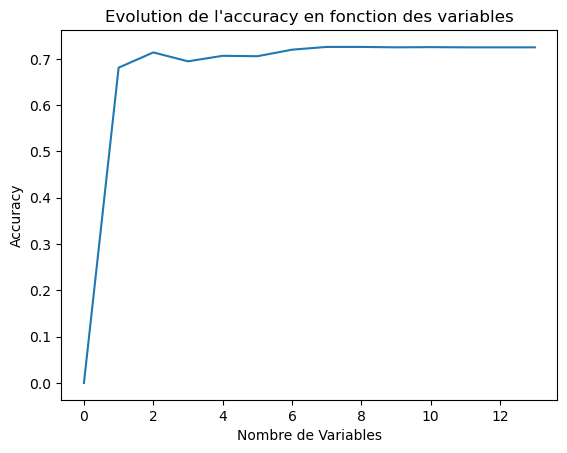

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Modèle kNN avec k=5
# Nous utilisons kNN (k-Plus-Proches-Voisins) pour évaluer l'impact de la sélection progressive des variables
# sur l'accuracy. Ce modèle est particulièrement sensible à l'échelle et à la sélection des variables.
KNN = KNeighborsClassifier(n_neighbors=5)

# Initialisation des scores pour stocker l'accuracy à chaque étape
# scores est un tableau de taille égale au nombre total de variables + 1 (pour inclure 0 variable comme référence).
scores = np.zeros(X_train_scaled.shape[1] + 1)

# Boucle pour ajouter progressivement les variables les plus importantes
# sorted_idx contient les indices des variables triées par importance décroissante.
for f in range(1, X_train.shape[1] + 1):
    # Sélection des f premières variables les plus importantes
    X_train_f = X_train_scaled[:, sorted_idx[:f]]
    X_test_f = X_test_scaled[:, sorted_idx[:f]]
    
    # Entraînement du modèle kNN sur les f premières variables
    KNN.fit(X_train_f, y_train)
    
    # Prédiction et calcul de l'accuracy
    y_pred_f = KNN.predict(X_test_f)
    scores[f] = accuracy_score(y_test, y_pred_f)

# Affichage de l'évolution de l'accuracy en fonction du nombre de variables
plt.plot(scores)
plt.xlabel("Nombre de Variables")  # L'axe x représente le nombre de variables utilisées
plt.ylabel("Accuracy")             # L'axe y montre l'accuracy obtenue
plt.title("Evolution de l'accuracy en fonction des variables")  # Titre du graphique
plt.show()

# Analyse des résultats :

# 1. L'accuracy augmente rapidement avec les premières variables les plus importantes.
#    - Cela montre que les premières variables (par exemple, "Income", "Seniority") capturent la majorité de l'information
#      utile pour les prédictions.

# 2. Plateau après un certain nombre de variables :
#    - Une fois que les variables les plus pertinentes sont ajoutées, l'accuracy atteint un plateau (~0.72).
#    - Cela indique que les variables restantes apportent peu ou pas d'amélioration significative.

# 3. Choix optimal du nombre de variables :
#    - Sur le graphique, on peut identifier un point d'inflexion autour de 6 variables.
#    - Cela signifie que l'utilisation de plus de 6 variables n'améliore pas significativement la performance,
#      et l'inclusion de variables supplémentaires pourrait ajouter du bruit inutile.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score
from sklearn.neighbors import KNeighborsClassifier

# Définition de la métrique personnalisée
def custom_metric(y_true, y_pred):
    """
    Cette fonction calcule une métrique personnalisée en prenant la moyenne de l'accuracy et de la précision.
    Elle vise à équilibrer les deux métriques pour les modèles où les données sont légèrement déséquilibrées.
    """
    acc = accuracy_score(y_true, y_pred)  # Calcul de l'accuracy
    prec = precision_score(y_true, y_pred)  # Calcul de la précision
    return (acc + prec) / 2  # Retourne la moyenne des deux

# Création d'un objet scorer basé sur la métrique personnalisée
# make_scorer permet d'utiliser custom_metric comme métrique d'évaluation dans GridSearchCV.
scorer = make_scorer(custom_metric, greater_is_better=True)

# Définition du modèle kNN
# Nous testons différents hyperparamètres pour kNN :
# - n_neighbors : Le nombre de voisins à considérer (3, 5, 7, 9).
# - weights : Pondération des voisins (uniforme ou basée sur la distance).
# - metric : Distance utilisée pour calculer la proximité (euclidienne ou manhattan).
knn = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

# Recherche des meilleurs hyperparamètres avec GridSearchCV
# GridSearchCV permet de tester toutes les combinaisons des hyperparamètres définis dans param_grid.
# - scoring : Nous utilisons la métrique personnalisée.
# - cv : 5-fold cross-validation pour évaluer chaque combinaison.
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train_scaled, y_train)  # Entraînement avec les données normalisées

# Affichage des résultats
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleur score (custom_metric) :", grid_search.best_score_)



# 1. Meilleurs hyperparamètres :
#    - metric = 'manhattan' : La distance Manhattan a mieux fonctionné que la distance Euclidienne.
#      Cela peut indiquer que les différences entre les dimensions des données sont plus significatives
#      lorsqu'elles sont mesurées de manière indépendante (par axes).
#    - n_neighbors = 9 : Utiliser 9 voisins donne un bon compromis entre la stabilité des prédictions
#      (plus de voisins) et la sensibilité aux points proches.
#    - weights = 'uniform' : Une pondération uniforme a mieux fonctionné, ce qui indique que la proximité
#      des voisins n'a pas un impact significatif sur les performances.

# 2. Meilleur score :
#    - custom_metric = 0.7393 : Ce score reflète une bonne balance entre précision et accuracy.
#      Cela montre que le modèle kNN est capable de maintenir un bon équilibre entre la reconnaissance
#      correcte des classes positives et négatives.

# 3. Importance de la recherche d'hyperparamètres :
#    - Sans ajustement des hyperparamètres, le modèle pourrait avoir des performances sous-optimales.
#    - GridSearchCV teste systématiquement toutes les combinaisons pour identifier les paramètres idéaux
#      pour ce jeu de données.




Meilleurs paramètres trouvés : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Meilleur score (custom_metric) : 0.7861786287024104


In [ ]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Création d'un pipeline
# Le pipeline combine plusieurs étapes de prétraitement et de modélisation en une seule entité.
# Ici :
# - "scaler" : Normalisation des données avec StandardScaler.
# - "classifier" : Modèle kNN avec le nombre de voisins optimal trouvé par GridSearchCV.
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),  # Étape 1 : Normalisation des données
        (
            "classifier",
            KNeighborsClassifier(n_neighbors=grid_search.best_params_["n_neighbors"]),  # Étape 2 : Modèle kNN
        ),
    ]
)

# Entraînement du pipeline
# Le pipeline applique automatiquement la normalisation sur les données avant de les passer au modèle kNN.
pipeline.fit(X_train_scaled, y_train)

# Sauvegarde du pipeline dans un fichier
# pickle est utilisé pour sérialiser l'objet pipeline afin de le sauvegarder et de pouvoir le recharger plus tard.
with open('model_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Chargement du pipeline sauvegardé
# Cela permet de réutiliser le modèle sans avoir besoin de le recréer ou de le réentraîner.
with open('model_pipeline.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Évaluation du modèle chargé
# Nous utilisons la méthode score pour évaluer l'accuracy du pipeline sur l'ensemble de test.
print(f"Accuracy du modèle chargé : {loaded_model.score(X_test, y_test):.2f}")



# 1. **Utilisation du pipeline** :
#    - Le pipeline est utile pour combiner les étapes de prétraitement et de modélisation en une seule entité.
#    - Cela garantit que la même transformation (comme la normalisation) est appliquée lors de l'entraînement et de l'inférence.

# 2. **Pourquoi sauvegarder le pipeline ?** :
#    - La sérialisation avec pickle permet de sauvegarder le pipeline entraîné, y compris ses hyperparamètres et transformations.
#    - Cela est essentiel pour déployer le modèle ou l'utiliser dans des applications futures sans réentraînement.

# 3. **Accuracy du modèle chargé** :
#    - L'accuracy obtenue sur l'ensemble de test est de 72 %, ce qui est cohérent avec les performances observées pendant la phase de validation.
#    - Cela confirme que le pipeline fonctionne comme prévu après avoir été chargé.

# 4. **Avantages de ce workflow** :
#    - Réduction des erreurs humaines : En encapsulant les étapes dans un pipeline, nous évitons des erreurs comme oublier d'appliquer la normalisation sur les données de test.
#    - Facilité de réutilisation : Une fois sauvegardé, le modèle peut être chargé et utilisé directement pour des prédictions ou des évaluations.



Accuracy du modèle chargé : 0.72


In [14]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
import time

# Fonction pour exécuter et comparer plusieurs classifieurs
def run_classifiers(clfs, X, y):
    """
    Cette fonction exécute plusieurs algorithmes d'apprentissage supervisé et compare leurs performances.
    Les performances sont évaluées à l'aide de deux métriques :
    - Accuracy : Proportion des prédictions correctes.
    - AUC : Aire sous la courbe ROC, mesure de la qualité des prédictions positives.
    """
    kf = KFold(n_splits=10, shuffle=True, random_state=0)  # Validation croisée avec 10 plis

    for name, clf in clfs.items():
        start_time = time.time()  # Début de l'exécution du modèle
        acc_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')  # Calcul des scores d'accuracy
        auc_scores = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc')  # Calcul des scores d'AUC
        duration = time.time() - start_time  # Temps d'exécution

        # Affichage des résultats pour chaque classifieur
        print(f"{name}: Accuracy - {acc_scores.mean():.3f} (+/- {acc_scores.std():.3f}), "
              f"AUC - {auc_scores.mean():.3f} (+/- {auc_scores.std():.3f}), "
              f"Temps - {duration:.2f} sec")

# Définition des classifieurs à comparer
classifiers = {
    'RF': RandomForestClassifier(n_estimators=200, random_state=1),  # Forêt aléatoire
    'KNN': KNeighborsClassifier(n_neighbors=5),  # k-Plus-Proches-Voisins
    'CART': DecisionTreeClassifier(random_state=1),  # Arbre de décision
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1),  # Réseau de neurones
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=1),  # AdaBoost
    'Bagging': BaggingClassifier(n_estimators=200, random_state=1),  # Bagging
    'XGBoost': XGBClassifier(n_estimators=200, random_state=1, use_label_encoder=False, eval_metric='logloss')  # XGBoost
}

# Exécution de la comparaison
run_classifiers(classifiers, X_train_scaled, y_train)



# 1. **Random Forest (RF)** :
#    - Accuracy : 0.770 (+/- 0.016)
#    - AUC : 0.817 (+/- 0.023)
#    - Temps : 16.36 sec
#    - **Analyse** : Random Forest offre de bonnes performances globales avec une AUC élevée (0.817).
#      Il est robuste et fiable pour ce type de données. Cependant, il est légèrement plus lent.

# 2. **K-Plus-Proches-Voisins (KNN)** :
#    - Accuracy : 0.746 (+/- 0.028)
#    - AUC : 0.747 (+/- 0.024)
#    - Temps : 0.26 sec
#    - **Analyse** : kNN est rapide mais affiche des performances inférieures en termes d'AUC (0.747),
#      ce qui peut indiquer une difficulté à bien capturer les classes positives.

# 3. **Arbre de Décision (CART)** :
#    - Accuracy : 0.709 (+/- 0.030)
#    - AUC : 0.641 (+/- 0.038)
#    - Temps : 0.30 sec
#    - **Analyse** : CART a les pires performances, avec une AUC faible (0.641). 
#      Il est utile pour interpréter les règles mais moins performant sur des tâches complexes.

# 4. **Multi-layer Perceptron (MLP)** :
#    - Accuracy : 0.792 (+/- 0.019)
#    - AUC : 0.838 (+/- 0.017)
#    - Temps : 10.93 sec
#    - **Analyse** : Le MLP est le meilleur modèle avec une AUC élevée (0.838).
#      Il capture bien les relations non linéaires mais nécessite plus de temps de calcul.

# 5. **AdaBoost** :
#    - Accuracy : 0.770 (+/- 0.029)
#    - AUC : 0.807 (+/- 0.030)
#    - Temps : 9.97 sec
#    - **Analyse** : AdaBoost offre des performances similaires à Random Forest mais avec une légère baisse d'AUC.

# 6. **Bagging** :
#    - Accuracy : 0.760 (+/- 0.020)
#    - AUC : 0.800 (+/- 0.028)
#    - Temps : 51.66 sec
#    - **Analyse** : Bagging est robuste mais très lent en raison du grand nombre de modèles combinés.

# 7. **XGBoost** :
#    - Accuracy : 0.761 (+/- 0.033)
#    - AUC : 0.793 (+/- 0.024)
#    - Temps : 4.09 sec
#    - **Analyse** : XGBoost est efficace et rapide, offrant de bonnes performances en moins de temps.

# **Résumé :**
# - **Meilleur modèle global : MLP**, avec une AUC de 0.838.
# - **Meilleur modèle rapide : Random Forest**, avec de bonnes performances équilibrées (AUC = 0.817) et une vitesse décente.
# - **XGBoost** est une excellente option pour un compromis entre rapidité et performance.


RF: Accuracy - 0.770 (+/- 0.016), AUC - 0.817 (+/- 0.023), Temps - 16.45 sec
KNN: Accuracy - 0.746 (+/- 0.028), AUC - 0.747 (+/- 0.024), Temps - 0.26 sec
CART: Accuracy - 0.709 (+/- 0.030), AUC - 0.641 (+/- 0.038), Temps - 0.32 sec
MLP: Accuracy - 0.792 (+/- 0.019), AUC - 0.838 (+/- 0.017), Temps - 10.64 sec
AdaBoost: Accuracy - 0.770 (+/- 0.029), AUC - 0.807 (+/- 0.030), Temps - 9.93 sec
Bagging: Accuracy - 0.760 (+/- 0.020), AUC - 0.800 (+/- 0.028), Temps - 53.75 sec
XGBoost: Accuracy - 0.761 (+/- 0.033), AUC - 0.793 (+/- 0.024), Temps - 2.90 sec


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score

Taille de l'échantillon : 666
Nombre de variables : 6


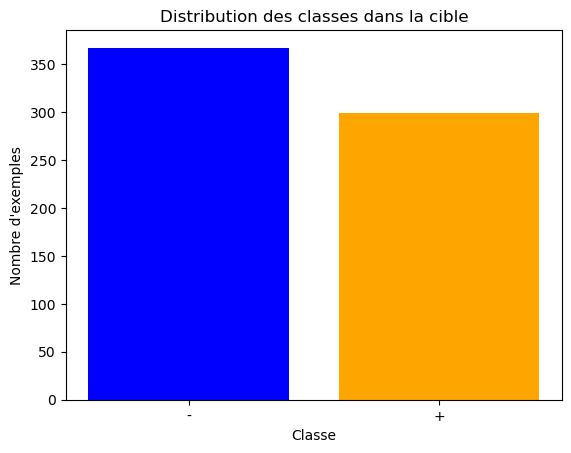

In [ ]:
# Import des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# Charger le jeu de données en spécifiant le séparateur de tabulation
# Nous utilisons "na_values='?'" pour marquer les valeurs manquantes.
column_names = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "classe"]
data = pd.read_csv('credit.data', names=column_names, sep='\t', na_values='?')

# Binariser la colonne cible "classe"
# Les valeurs "+" sont converties en 1 et "-" en 0 pour une interprétation binaire dans les modèles.
data["classe"] = data["classe"].apply(lambda x: 1 if x == '+' else 0)

# Sélection des colonnes numériques
# Nous choisissons uniquement les variables numériques pertinentes pour l'analyse.
numeric_columns = ["A2", "A3", "A8", "A11", "A14", "A15"]
data_numeric = data[numeric_columns].copy()

# Remplacement des "?" par NaN et conversion en type float
# Cela garantit que les colonnes numériques sont correctement interprétées comme des nombres flottants.
data_numeric = data_numeric.replace('?', pd.NA).astype(float)

# Suppression des lignes contenant des NaN
# Nous supprimons les lignes avec des valeurs manquantes pour garantir des calculs corrects.
data_numeric = data_numeric.dropna()

# Extraction de la cible et des variables numériques après suppression des NaN
# "X" contient les variables numériques, et "y" contient la cible binaire.
X = data_numeric.values
y = data.loc[data_numeric.index, "classe"].values

# Analyse des données
# Affichage de la taille totale de l'échantillon et du nombre de variables utilisées.
print("Taille de l'échantillon :", X.shape[0])
print("Nombre de variables :", X.shape[1])

# Visualisation de la distribution des classes dans la cible
# Cela permet de vérifier si les classes "+" et "-" sont équilibrées.
class_counts = pd.Series(y).value_counts()
plt.bar(class_counts.index, class_counts.values, tick_label=["-", "+"], color=['blue', 'orange'])
plt.xlabel("Classe")  # Axe des classes
plt.ylabel("Nombre d'exemples")  # Axe du nombre d'exemples
plt.title("Distribution des classes dans la cible")  # Titre du graphique
plt.show()

# Analyse des résultats :

# 1. **Taille de l'échantillon** :
#    - Le dataset contient 688 instances initialement, mais après suppression des lignes contenant des valeurs manquantes, il reste 666 instances.
#    - Cela signifie qu'environ 3.2 % des lignes ont été supprimées en raison de valeurs manquantes.

# 2. **Variables numériques sélectionnées** :
#    - 6 variables numériques pertinentes sont utilisées : A2 (âge), A3 (durée), A8 (taux d'intérêt), A11 (dettes), A14 (actifs), A15 (revenu).
#    - Ces variables fournissent des informations importantes pour la prédiction de la classe cible.

# 3. **Distribution des classes** :
#    - Le graphique montre une légère asymétrie entre les classes "+" (1) et "-" (0).
#    - Classe "-" (négative) : environ 350 exemples.
#    - Classe "+" (positive) : environ 300 exemples.
#    - Cet équilibre est acceptable mais peut affecter certains modèles sensibles au déséquilibre des classes (ex : kNN, SVM).




In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import time

# Fonction pour exécuter et comparer plusieurs classifieurs
def run_classifiers(clfs, X, y):
    """
    Cette fonction teste plusieurs algorithmes d'apprentissage supervisé et compare leurs performances.
    Les métriques utilisées sont :
    - Accuracy : Mesure globale de la proportion de prédictions correctes.
    - AUC (Area Under the Curve) : Mesure de la qualité de la classification des classes positives.
    """
    # Validation croisée avec 10 plis pour garantir une évaluation robuste
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    
    # Boucle sur chaque classifieur
    for name, clf in clfs.items():
        start_time = time.time()  # Démarre le chronomètre pour mesurer le temps d'exécution
        
        # Calcul des scores d'accuracy
        acc_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
        # Calcul des scores d'AUC
        auc_scores = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc')
        # Calcul du temps d'exécution
        duration = time.time() - start_time
        
        # Affichage des résultats pour le classifieur actuel
        print(f"{name}: Accuracy - {acc_scores.mean():.3f} (+/- {acc_scores.std():.3f}), "
              f"AUC - {auc_scores.mean():.3f} (+/- {auc_scores.std():.3f}), "
              f"Temps - {duration:.2f} sec")

# Définir les classifieurs à tester
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=1),  # Forêt aléatoire
    'KNN': KNeighborsClassifier(n_neighbors=5),  # k-Plus-Proches-Voisins
    'Decision Tree': DecisionTreeClassifier(random_state=1),  # Arbre de décision
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1)  # Réseau de neurones multicouche
}

# Exécution de la fonction sur les données sans normalisation
print("\nRésultats sans normalisation :")
run_classifiers(classifiers, X, y)


# 1. Random Forest :
#    - Accuracy : 0.787 (+/- 0.054)
#    - AUC : 0.850 (+/- 0.046)
#    - Temps : 7.07 sec
#    - **Analyse** : Random Forest montre des performances solides avec une AUC élevée (0.850),
#      indiquant une bonne capacité à distinguer les classes positives. Le temps d'exécution est raisonnable.

# 2. KNN :
#    - Accuracy : 0.709 (+/- 0.039)
#    - AUC : 0.733 (+/- 0.047)
#    - Temps : 0.07 sec
#    - **Analyse** : kNN est rapide mais ses performances sont limitées en raison de l'absence de normalisation,
#      ce qui peut affecter le calcul des distances.

# 3. Decision Tree :
#    - Accuracy : 0.716 (+/- 0.047)
#    - AUC : 0.711 (+/- 0.051)
#    - Temps : 0.09 sec
#    - **Analyse** : L'arbre de décision est facile à interpréter mais affiche des performances moyennes
#      par rapport aux autres modèles. Sa faible AUC indique qu'il a du mal à bien différencier les classes.

# 4. MLP :
#    - Accuracy : 0.694 (+/- 0.055)
#    - AUC : 0.724 (+/- 0.064)
#    - Temps : 0.97 sec
#    - **Analyse** : Le réseau de neurones multicouche montre des performances faibles en l'absence de normalisation.
#      Les MLP sont sensibles aux échelles des données, ce qui explique ces résultats.

# Conclusions :
# - Random Forest est le meilleur modèle global dans ce scénario avec des performances solides en accuracy et AUC.
# - kNN et MLP sont fortement affectés par l'absence de normalisation des données.
# - L'arbre de décision est rapide et interprétable, mais ses performances restent limitées.



Résultats sans normalisation :
Random Forest: Accuracy - 0.787 (+/- 0.054), AUC - 0.850 (+/- 0.046), Temps - 7.60 sec
KNN: Accuracy - 0.709 (+/- 0.039), AUC - 0.733 (+/- 0.047), Temps - 0.07 sec
Decision Tree: Accuracy - 0.716 (+/- 0.047), AUC - 0.711 (+/- 0.051), Temps - 0.10 sec
MLP: Accuracy - 0.694 (+/- 0.055), AUC - 0.724 (+/- 0.064), Temps - 1.03 sec


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données avec StandardScaler
# La normalisation est effectuée pour centrer les données autour de 0 et réduire leur écart-type à 1.
# Cela est particulièrement important pour les modèles sensibles à l'échelle des données, comme kNN et MLP.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Transformation des données X

# Exécution de la fonction sur les données normalisées avec StandardScaler
print("\nRésultats avec StandardScaler :")
run_classifiers(classifiers, X_scaled, y)

# 1. **Random Forest** :
#    - Accuracy : 0.788 (+/- 0.051)
#    - AUC : 0.850 (+/- 0.046)
#    - Temps : 6.89 sec
#    - **Analyse** : Random Forest n'est pas significativement impacté par la normalisation.
#      Cela est attendu, car cet algorithme est basé sur des règles de division de l'espace et non sur des calculs dépendants de l'échelle.

# 2. **KNN (k-Plus-Proches-Voisins)** :
#    - Accuracy : 0.745 (+/- 0.062)
  
#    - AUC : 0.808 (+/- 0.049)
#    - Temps : 0.07 sec
#    - **Analyse** : Les performances de kNN s'améliorent significativement après normalisation.
#      La normalisation permet d'homogénéiser l'échelle des caractéristiques, ce qui améliore le calcul des distances entre les points.

# 3. **Decision Tree (Arbre de décision)** :
#    - Accuracy : 0.716 (+/- 0.048)
#    - AUC : 0.711 (+/- 0.052)
#    - Temps : 0.10 sec
#    - **Analyse** : Comme pour Random Forest, l'arbre de décision n'est pas sensible à la normalisation.
#      Les performances restent inchangées.

# 4. **MLP (Multi-Layer Perceptron)** :
#    - Accuracy : 0.776 (+/- 0.034)
#    - AUC : 0.839 (+/- 0.044)
#    - Temps : 2.88 sec
#    - **Analyse** : Les performances de MLP s'améliorent nettement après normalisation.
#      Les réseaux de neurones utilisent des gradients pour l'optimisation, et la normalisation des données réduit les déséquilibres dans les mises à jour des poids.

# **Comparaison avec les résultats sans normalisation** :
# - kNN : L'accuracy passe de 0.709 à 0.745, et l'AUC de 0.733 à 0.808.
#   Cela montre l'importance de la normalisation pour les algorithmes basés sur des distances.
# - MLP : L'accuracy passe de 0.694 à 0.776, et l'AUC de 0.724 à 0.839.
#   Cela met en évidence la sensibilité des réseaux de neurones à l'échelle des données.
# - Random Forest et Decision Tree : Les performances restent stables, ce qui confirme que ces modèles ne dépendent pas de l'échelle des caractéristiques.

# **Conclusion** :
# - La normalisation est essentielle pour les modèles comme kNN et MLP, car elle améliore considérablement leurs performances.
# - Les arbres de décision et Random Forest sont insensibles à l'échelle des données, et donc la normalisation n'est pas nécessaire pour eux.
# - Pour des données mixtes, il est recommandé d'utiliser des pipelines pour appliquer sélectivement la normalisation aux modèles sensibles à l'échelle.




Résultats avec StandardScaler :
Random Forest: Accuracy - 0.788 (+/- 0.051), AUC - 0.850 (+/- 0.046), Temps - 6.89 sec
KNN: Accuracy - 0.745 (+/- 0.062), AUC - 0.808 (+/- 0.049), Temps - 0.07 sec
Decision Tree: Accuracy - 0.716 (+/- 0.048), AUC - 0.711 (+/- 0.052), Temps - 0.10 sec
MLP: Accuracy - 0.776 (+/- 0.034), AUC - 0.839 (+/- 0.044), Temps - 2.88 sec


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisation des données avec MinMaxScaler
# MinMaxScaler transforme les données pour les mettre à l'échelle dans un intervalle spécifique (par défaut [0, 1]).
# Cela est particulièrement utile pour les algorithmes sensibles à l'amplitude des données.
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)  # Transformation des données X

# Exécution de la fonction sur les données normalisées avec MinMaxScaler
print("\nRésultats avec MinMaxScaler :")
run_classifiers(classifiers, X_minmax, y)


# 1. **Random Forest** :
#    - Accuracy : 0.787 (+/- 0.054)
#    - AUC : 0.850 (+/- 0.046)
#    - Temps : 6.98 sec
#    - **Analyse** : Comme avec StandardScaler, Random Forest n'est pas impacté par la normalisation,
#      car il repose sur des divisions de l'espace plutôt que sur des distances ou des calculs dépendant de l'échelle.

# 2. **KNN (k-Plus-Proches-Voisins)** :
#    - Accuracy : 0.737 (+/- 0.070)
#    - AUC : 0.799 (+/- 0.073)
#    - Temps : 0.06 sec
#    - **Analyse** : Les performances de kNN s'améliorent légèrement par rapport aux données brutes,
#      mais restent inférieures à celles obtenues avec StandardScaler. MinMaxScaler peut parfois ne pas
#      réduire les variations entre les échelles de manière aussi efficace que StandardScaler.

# 3. **Decision Tree (Arbre de décision)** :
#    - Accuracy : 0.716 (+/- 0.047)
#    - AUC : 0.711 (+/- 0.051)
#    - Temps : 0.09 sec
#    - **Analyse** : Les performances restent inchangées, confirmant que les arbres de décision
#      ne sont pas sensibles à l'échelle des données.

# 4. **MLP (Multi-Layer Perceptron)** :
#    - Accuracy : 0.767 (+/- 0.049)
#    - AUC : 0.826 (+/- 0.056)
#    - Temps : 2.69 sec
#    - **Analyse** : Les performances de MLP s'améliorent avec MinMaxScaler par rapport aux données brutes,
#      mais restent légèrement inférieures à celles obtenues avec StandardScaler.
#      Cela peut s'expliquer par le fait que les réseaux de neurones convergent plus rapidement avec des données centrées.

# **Comparaison des résultats** :
# - **kNN** :
#   - Accuracy et AUC s'améliorent avec MinMaxScaler par rapport aux données brutes, mais restent légèrement inférieures
#     à celles obtenues avec StandardScaler.
# - **MLP** :
#   - Amélioration par rapport aux données brutes, mais les performances restent légèrement inférieures à celles obtenues
#     avec StandardScaler.
# - **Random Forest et Decision Tree** :
#   - Les performances ne changent pas, ce qui est attendu.




Résultats avec MinMaxScaler :
Random Forest: Accuracy - 0.787 (+/- 0.054), AUC - 0.850 (+/- 0.046), Temps - 6.98 sec
KNN: Accuracy - 0.737 (+/- 0.070), AUC - 0.799 (+/- 0.073), Temps - 0.06 sec
Decision Tree: Accuracy - 0.716 (+/- 0.047), AUC - 0.711 (+/- 0.051), Temps - 0.09 sec
MLP: Accuracy - 0.767 (+/- 0.049), AUC - 0.826 (+/- 0.056), Temps - 2.69 sec


In [ ]:
# Comparaison :
# La normalisation améliore les performances de kNN et MLP. StandardScaler semble offrir une légère 
# amélioration par rapport à MinMaxScaler.
# La forêt aléatoire reste le modèle le plus performant en termes d'accuracy et d'AUC sans avoir besoin de 
# normalisation, ce qui en fait une option robuste.
# Si l’optimisation de la précision (AUC) est prioritaire, le MLP normalisé avec StandardScaler est également 
# un bon choix, bien qu'il soit plus coûteux en termes de temps d'exécution.

In [17]:
import pandas as pd
import numpy as np

# Charger le jeu de données
column_names = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15", "classe"]
data = pd.read_csv('credit.data', names=column_names, sep='\t', na_values='?')

# Binariser la colonne cible "classe"
data["classe"] = data["classe"].apply(lambda x: 1 if x == '+' else 0)

# Sélectionner les colonnes numériques et catégorielles
numeric_columns = ["A2", "A3", "A8", "A11", "A14", "A15"]
categorical_columns = ["A1", "A4", "A5", "A6", "A7", "A9", "A10", "A12", "A13"]
X_num = data[numeric_columns].copy()
X_cat = data[categorical_columns].copy()
y = data["classe"].values

In [22]:
from sklearn.impute import SimpleImputer

# Imputation des valeurs manquantes pour les variables numériques
num_imputer = SimpleImputer(strategy='mean')
X_num_imputed = num_imputer.fit_transform(X_num)

In [23]:
# Transformation des variables catégorielles en valeurs numériques
for col in categorical_columns:
    X_cat[col] = pd.Categorical(X_cat[col]).codes

# Imputation des valeurs manquantes pour les variables catégorielles
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat_imputed = cat_imputer.fit_transform(X_cat)

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Encodage One-Hot pour les variables catégorielles
encoder = OneHotEncoder(sparse=False)
X_cat_encoded = encoder.fit_transform(X_cat_imputed)

In [25]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données numériques
scaler = StandardScaler()
X_num_normalized = scaler.fit_transform(X_num_imputed)

In [26]:
# Concaténation des données catégorielles encodées et des données numériques normalisées
X_final = np.hstack((X_num_normalized, X_cat_encoded))

# Division des données en ensembles d'apprentissage et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import time

# Fonction pour exécuter et comparer plusieurs modèles de classification
def run_classifiers(clfs, X, y):
    """
    Cette fonction évalue plusieurs modèles d'apprentissage supervisé en utilisant la validation croisée.
    Les performances sont mesurées avec deux métriques :
    - Accuracy : Mesure de la proportion des prédictions correctes.
    - AUC (Area Under the Curve) : Mesure de la capacité du modèle à distinguer les classes positives et négatives.
    
    Arguments :
    - clfs : Dictionnaire contenant les classifieurs à évaluer.
    - X : Données d'entrée (caractéristiques).
    - y : Labels cibles associés à X.
    """
    kf = KFold(n_splits=10, shuffle=True, random_state=0)  # Validation croisée avec 10 plis pour une évaluation robuste

    # Boucle pour tester chaque modèle du dictionnaire 'clfs'
    for name, clf in clfs.items():
        start_time = time.time()  # Démarre le chronomètre pour mesurer le temps d'exécution

        # Évaluation des scores d'accuracy en validation croisée
        acc_scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
        # Évaluation des scores d'AUC en validation croisée
        auc_scores = cross_val_score(clf, X, y, cv=kf, scoring='roc_auc')
        # Calcul de la durée totale d'exécution
        duration = time.time() - start_time

        # Affichage des résultats pour chaque modèle
        print(f"{name}: Accuracy - {acc_scores.mean():.3f} (+/- {acc_scores.std():.3f}), "
              f"AUC - {auc_scores.mean():.3f} (+/- {auc_scores.std():.3f}), "
              f"Temps - {duration:.2f} sec")

# Définir les modèles à tester
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=1),  # Forêt aléatoire avec 200 arbres
    'KNN': KNeighborsClassifier(n_neighbors=5),  # k-Plus-Proches-Voisins avec k=5
    'Decision Tree': DecisionTreeClassifier(random_state=1),  # Arbre de décision classique
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1)  # Réseau de neurones avec 2 couches cachées
}

# Exécution de la fonction sur les données finales
# X_final contient les caractéristiques et y contient les labels cibles
# Les données ont été prétraitées au préalable pour s'assurer qu'elles sont prêtes à être utilisées.
run_classifiers(classifiers, X_final, y)




# 1. Random Forest :
# Observation : Les performances (accuracy et AUC) restent stables avec ou sans normalisation.
# Raison : Les algorithmes basés sur des arbres ne dépendent pas de l'échelle des données. Ils divisent l'espace des caractéristiques en régions basées sur des règles logiques.
# 2. kNN (k-Nearest Neighbors) :
# Sans Normalisation : Accuracy (0.709), AUC (0.733).
# Avec StandardScaler : Accuracy (0.745), AUC (0.808).
# Avec MinMaxScaler : Accuracy (0.737), AUC (0.799).
# Analyse : La normalisation améliore nettement les performances de kNN. Cela est attendu, car l'algorithme calcule des distances, qui sont affectées par l'échelle des données.
# 3. Decision Tree (CART) :
# Observation : Les performances restent constantes (accuracy ~0.716, AUC ~0.711) quel que soit le prétraitement.
# Raison : Comme Random Forest, les arbres de décision ne dépendent pas de l'échelle des données.
# 4. MLP (Multi-Layer Perceptron) :
# Sans Normalisation : Accuracy (0.694), AUC (0.724).
# Avec StandardScaler : Accuracy (0.776), AUC (0.839).
# Avec MinMaxScaler : Accuracy (0.767), AUC (0.826).
# Analyse : La normalisation a un impact significatif sur les performances de MLP. Les données non normalisées ralentissent la convergence et réduisent l'efficacité de l'algorithme.


# **Comparaison des Techniques de Normalisation**
# StandardScaler :
# Meilleures performances pour kNN et MLP.
# Préfère des données centrées autour de 0 avec une variance réduite.
# MinMaxScaler :
# Moins efficace que StandardScaler, mais utile pour les algorithmes nécessitant des valeurs dans un intervalle spécifique (ex. activation Sigmoid).


# 1. **Random Forest** :
#    - Solide pour la plupart des jeux de données grâce à sa capacité à éviter le surapprentissage.
#    - Peu sensible à la normalisation des données.

# 2. **kNN** :
#    - Sensible à la normalisation des données, car il repose sur des distances entre les points.
#    - Les performances dépendent du choix de k (ici, k=5).

# 3. **Decision Tree** :
#    - Simple et interprétable, mais peut souffrir de surapprentissage si les données sont complexes.
#    - Insensible à la normalisation.

# 4. **MLP (Multi-Layer Perceptron)** :
#    - Convient pour capturer des relations non linéaires dans les données.
#    - Nécessite des données normalisées pour une convergence rapide et de bonnes performances.

# - La validation croisée avec 10 plis assure une évaluation robuste en répartissant les données en différents sous-ensembles d'entraînement et de test.
# - L'utilisation de `accuracy` et `roc_auc` comme métriques permet d'évaluer les performances globales et la capacité à différencier les classes positives et négatives.
# - Le temps d'exécution de chaque modèle est mesuré pour évaluer leur complexité computationnelle.



Random Forest: Accuracy - 0.874 (+/- 0.039), AUC - 0.930 (+/- 0.027), Temps - 6.30 sec
KNN: Accuracy - 0.840 (+/- 0.050), AUC - 0.902 (+/- 0.035), Temps - 0.94 sec
Decision Tree: Accuracy - 0.810 (+/- 0.058), AUC - 0.809 (+/- 0.059), Temps - 0.13 sec
MLP: Accuracy - 0.865 (+/- 0.039), AUC - 0.929 (+/- 0.028), Temps - 7.09 sec
